<a href="https://colab.research.google.com/github/BaijuThomasAV/Sandbox/blob/main/MR_Solution_sanbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [ ]:
# Define function to calculate P&L components
def calculate_pnl(delta, gamma, theta, vega, volga, vanna, cross_gamma, spot_price_day1, spot_price_day2, dsigma, dt, relative_difference=False):
    # Calculate dS based on the relative or absolute difference
    if relative_difference:
        dS = (spot_price_day1 / spot_price_day2) - 1  # Relative difference (percentage change)
        # For FX
        ##dS = (spot_price_day2 / spot_price_day1) - 1  # Relative difference (percentage change)
    else:
        dS = spot_price_day1 - spot_price_day2  # Absolute difference

    # Calculate each P&L component
    delta_pnl = delta * dS
    gamma_pnl = 0.5 * gamma * (dS ** 2)
    theta_pnl = theta * dt
    vega_pnl = vega * dsigma
    volga_pnl = 0.5 * volga * (dsigma ** 2)
    vanna_pnl = vanna * dS * dsigma

    # Cross Gamma P&L: accounts for interaction between spot price and volatility changes
    cross_gamma_pnl = cross_gamma * dS * dsigma

    # Output each P&L component
    print(f"Delta P&L: {delta_pnl:.2f}")
    print(f"Gamma P&L: {gamma_pnl:.2f}")
    print(f"Theta P&L: {theta_pnl:.2f}")
    print(f"Vega P&L: {vega_pnl:.2f}")
    print(f"Volga P&L: {volga_pnl:.2f}")
    print(f"Vanna P&L: {vanna_pnl:.2f}")
    print(f"Cross Gamma P&L: {cross_gamma_pnl:.2f}")

    # Calculate and return total P&L
    total_pnl = delta_pnl + gamma_pnl + theta_pnl + vega_pnl + volga_pnl + vanna_pnl + cross_gamma_pnl
    print(f"Total P&L: {total_pnl:.2f}")
    return total_pnl

#  input parameters
delta_previous = -155849.20
gamma_previous = 48.35
theta_previous = -9.7
vega_previous = 7
volga_previous = 3.50  #  input  volga
vanna_previous = 68.36  #  input vanna
cross_gamma_previous = 0.05  #  input cross-gamma
spot_price_day1 = 104.57
spot_price_day2 = 102.87
dsigma_input = 0.38  # Solution needs - Vega Current MD - Vega Previous MD)
dt_input = 1 / 365  # Input change in time (1 day)

# Call the function with absolute difference
print("Using Absolute Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=False)

# Call the function with relative difference
print("\nUsing Relative Difference:")
calculate_pnl(delta_previous, gamma_previous, theta_previous, vega_previous, volga_previous, vanna_previous, cross_gamma_previous, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=True)

# Output statements
print("\nAsset Class Delta Explanation:")
print("1) Interest Rate (IR) Delta: Uses absolute basis point change.")
print("2) Credit/Repo Delta: Uses absolute basis point change.")
print("3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)")
print("4) Equity Delta: Uses relative price change.")
print("5) Commodity Delta: Uses relative price change.")
print("6) Vega and Volga is always Absolute change for all asset class.")
print("7) Theta change - TBD.")
print("8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)")
print("8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and the logic of the Diff values will follow the same as the above asset class rules of Relative vs Absolute  # in solution also drag and drop Risk Factor secondary)")
print("8) Vanna MDX saved in training file)")
print("9) Cross_gamma- TBD)")
print("10) Note: For Taylor VaR, we asks for the shifts and not the prices so the above market data related to dS and dsigma is supplied as Shifts from the client and client can decide relative Vs Absolute)")


Using Absolute Difference:
Delta P&L: -264943.64
Gamma P&L: 69.87
Theta P&L: -0.03
Vega P&L: 2.66
Volga P&L: 0.25
Vanna P&L: 44.16
Cross Gamma P&L: 0.03
Total P&L: -264826.70

Using Relative Difference:
Delta P&L: -2575.52
Gamma P&L: 0.01
Theta P&L: -0.03
Vega P&L: 2.66
Volga P&L: 0.25
Vanna P&L: 0.43
Cross Gamma P&L: 0.00
Total P&L: -2572.20

Asset Class Delta Explanation:
1) Interest Rate (IR) Delta: Uses absolute basis point change.
2) Credit/Repo Delta: Uses absolute basis point change.
3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)
4) Equity Delta: Uses relative price change.
5) Commodity Delta: Uses relative price change.
6) Vega and Volga is always Absolute change for all asset class.
7) Theta change - TBD.
8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)
8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's set

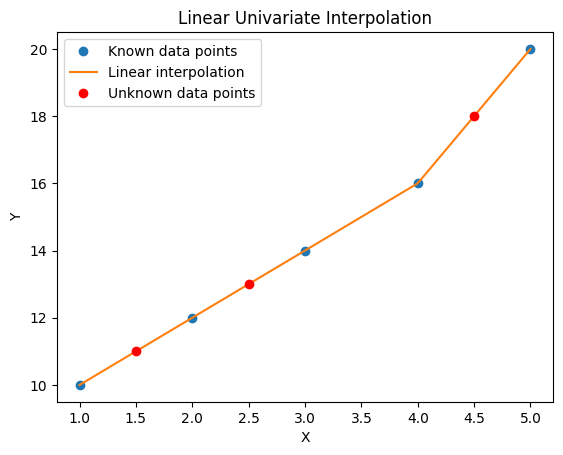

In [12]:
##1. LinearUnivariateInterpolatorFactory: Linear interpolation along a single axis.

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points (x-axis)
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 12, 14, 16, 20])

# Linear interpolation
linear_interpolator = interp1d(x, y, kind='linear')

# Interpolation for unknown points
x_new = np.linspace(1, 5, 100)
y_new = linear_interpolator(x_new)

# Unknown points
unknown_x = np.array([1.5, 2.5, 4.5])
unknown_y = linear_interpolator(unknown_x)

# Plotting
plt.plot(x, y, 'o', label='Known data points')
plt.plot(x_new, y_new, '-', label='Linear interpolation')
plt.plot(unknown_x, unknown_y, 'ro', label='Unknown data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Univariate Interpolation')
plt.legend()
plt.show()


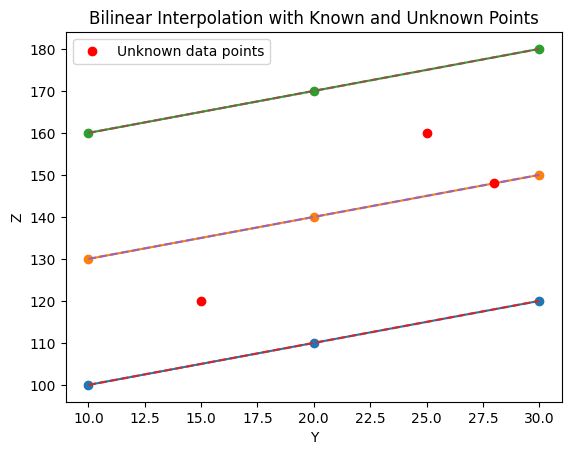

In [23]:
##Bilinear Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Known data points on a 2D grid (x, y axes)
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])
z = np.array([[100, 110, 120], [130, 140, 150], [160, 170, 180]])  # Function values

# Create the bilinear interpolator
bilinear_interpolator = RegularGridInterpolator((x, y), z)

# Interpolation for unknown points
unknown_points = np.array([[1.5, 15], [2.5, 25], [2, 28]])  # (x, y) unknown points
interpolated_values = bilinear_interpolator(unknown_points)

# Plotting known data points (same as univariate but with 2D)
for i in range(len(x)):
    plt.plot(y, z[i], 'o-', label=None)  # No label for known data points

# Interpolation for new points along x, y axes
y_new = np.linspace(10, 30, 100)
for xi in x:
    z_new = bilinear_interpolator((np.full_like(y_new, xi), y_new))
    plt.plot(y_new, z_new, '--', label=None)  # No label for interpolated lines

# Plotting unknown points with a legend
plt.plot(unknown_points[:, 1], interpolated_values, 'ro', label='Unknown data points')

# Labels and title
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Bilinear Interpolation with Known and Unknown Points')
plt.legend()

# Show the plot
plt.show()




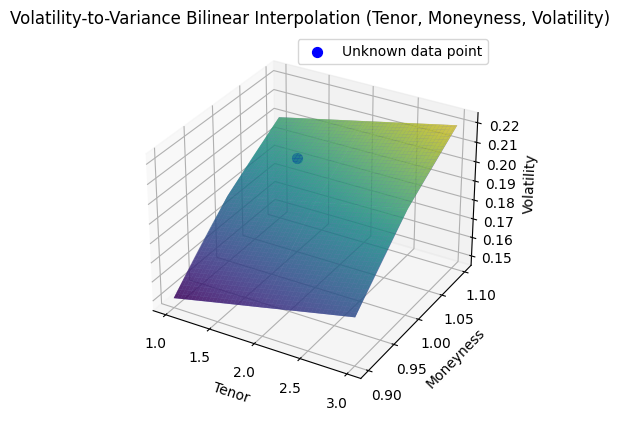

In [31]:
## VolToVarianceBilinearInterpolatorFactory: Volatility-to-Variance transformation and bilinear interpolation (3D)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Known volatility data
tenors = np.array([1, 2, 3])  # Tenors (replacing maturities)
moneyness = np.array([0.9, 1.0, 1.1])
volatility_surface = np.array([[0.15, 0.18, 0.20], [0.16, 0.19, 0.21], [0.17, 0.20, 0.22]])

# Convert to variance (Volatility^2)
variance_surface = volatility_surface ** 2

# Bilinear interpolation in variance space
variance_interpolator = RegularGridInterpolator((tenors, moneyness), variance_surface)

# Interpolation at unknown point
unknown_point = [1.5, 1.05]  # Tenor = 1.5 years, Moneyness = 1.05
interpolated_variance = variance_interpolator(unknown_point)

# Convert back to volatility
interpolated_volatility = np.sqrt(interpolated_variance)

# Prepare grid for plotting
tenor_grid, moneyness_grid = np.meshgrid(tenors, moneyness, indexing='ij')
volatility_grid = np.sqrt(variance_surface)

# Create a finer grid for interpolation
tenor_fine, moneyness_fine = np.meshgrid(np.linspace(1, 3, 100), np.linspace(0.9, 1.1, 100), indexing='ij')
variance_fine = variance_interpolator((tenor_fine, moneyness_fine))
volatility_fine = np.sqrt(variance_fine)

# Plotting the surface in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original volatility surface
ax.plot_surface(tenor_grid, moneyness_grid, volatility_grid, color='b', alpha=0.5, rstride=1, cstride=1)

# Plot interpolated surface
ax.plot_surface(tenor_fine, moneyness_fine, volatility_fine, cmap='viridis', alpha=0.7)

# Plot the unknown point in blue
unknown_plot = ax.scatter(unknown_point[0], unknown_point[1], interpolated_volatility, color='blue', s=50, label='Unknown data point')

# Labels
ax.set_xlabel('Tenor')
ax.set_ylabel('Moneyness')
ax.set_zlabel('Volatility')
ax.set_title('Volatility-to-Variance Bilinear Interpolation (Tenor, Moneyness, Volatility)')

# Legend only for the unknown point
ax.legend([unknown_plot], ['Unknown data point'])

plt.show()




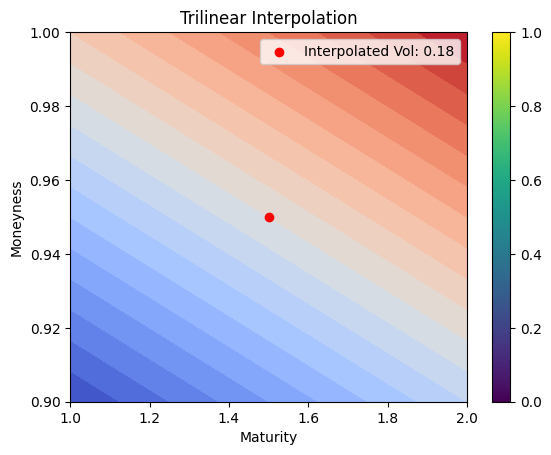

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Known data points for a 3D grid (maturities, tenors, moneyness)
maturities = np.array([1, 2])
tenors = np.array([30, 60])
moneyness = np.array([0.9, 1.0])

# Example surface data (volatility)
vol_surface = np.array([[[0.15, 0.18], [0.16, 0.19]],
                        [[0.17, 0.20], [0.18, 0.21]]])

# Create trilinear interpolator
trilinear_interpolator = RegularGridInterpolator((maturities, tenors, moneyness), vol_surface)

# Interpolation for unknown point
unknown_point = [1.5, 45, 0.95]
interpolated_vol = trilinear_interpolator(unknown_point).item()  # Convert to scalar using .item()

# Plotting (a 2D slice of the surface for tenor=45)
maturity_grid, moneyness_grid = np.meshgrid(np.linspace(1, 2, 100), np.linspace(0.9, 1.0, 100))
z_grid = trilinear_interpolator((maturity_grid.ravel(), np.full_like(maturity_grid.ravel(), 45), moneyness_grid.ravel()))
z_grid = z_grid.reshape(100, 100)

plt.contourf(maturity_grid, moneyness_grid, z_grid, levels=20, cmap='coolwarm')
plt.scatter(unknown_point[0], unknown_point[2], color='red', label=f'Interpolated Vol: {interpolated_vol:.2f}')
plt.xlabel('Maturity')
plt.ylabel('Moneyness')
plt.title('Trilinear Interpolation')
plt.legend()
plt.colorbar()
plt.show()



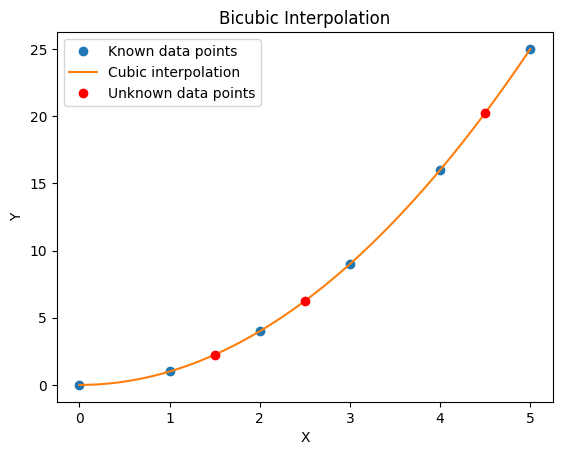

In [37]:
##BicubicInterpolatorFactory

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Cubic interpolation
cubic_interpolator = interp1d(x, y, kind='cubic')

# Interpolation for unknown points
x_new = np.linspace(0, 5, 100)
y_cubic = cubic_interpolator(x_new)

# Unknown points
unknown_x = np.array([1.5, 2.5, 4.5])
unknown_y = cubic_interpolator(unknown_x)

# Plotting
plt.plot(x, y, 'o', label='Known data points')
plt.plot(x_new, y_cubic, '-', label='Cubic interpolation')
plt.plot(unknown_x, unknown_y, 'ro', label='Unknown data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bicubic Interpolation')
plt.legend()
plt.show()

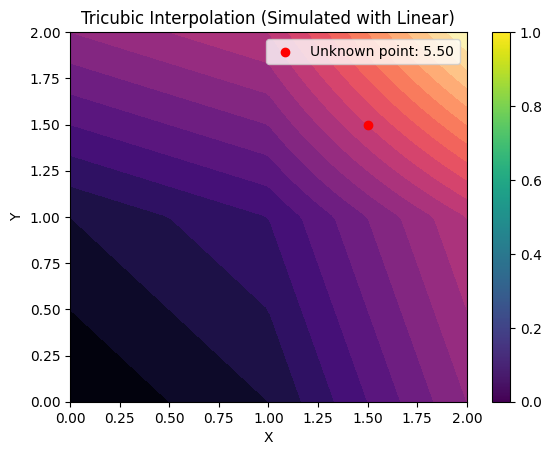

In [40]:
##Tricubic Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Known data points for a 2D grid
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
z = np.array([[0, 1, 4], [1, 2, 5], [4, 5, 10]])

# Tricubic interpolation
cubic_interpolator = RegularGridInterpolator((x, y), z, method='linear')  # cubic method isn't available, so using 'linear'

# Interpolation for unknown points
unknown_point = [1.5, 1.5]
interpolated_value = cubic_interpolator(unknown_point).item()  # Convert result to scalar

# Plotting
x_new, y_new = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))
z_new = cubic_interpolator((x_new.ravel(), y_new.ravel())).reshape(100, 100)

plt.contourf(x_new, y_new, z_new, levels=20, cmap='magma')
plt.scatter(unknown_point[0], unknown_point[1], color='red', label=f'Unknown point: {interpolated_value:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tricubic Interpolation (Simulated with Linear)')
plt.legend()
plt.colorbar()
plt.show()



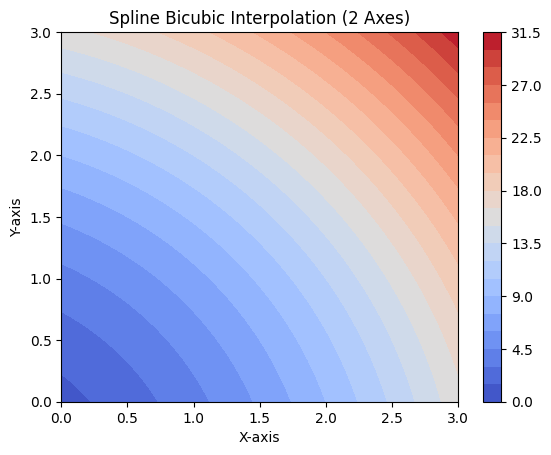

In [41]:
##Spline Bicubic Interpolation (2 Axes)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Known data points on a 2D grid (x, y axes)
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 2, 3])
z = np.array([[1, 4, 9, 16], [4, 7, 12, 19], [9, 12, 17, 24], [16, 19, 24, 31]])

# Spline bicubic interpolation
spline_bicubic = RectBivariateSpline(x, y, z)

# Interpolation for new points
x_new = np.linspace(0, 3, 100)
y_new = np.linspace(0, 3, 100)
x_grid, y_grid = np.meshgrid(x_new, y_new)
z_new = spline_bicubic(x_new, y_new)

# Plotting the interpolated surface
plt.contourf(x_grid, y_grid, z_new, levels=20, cmap='coolwarm')
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Spline Bicubic Interpolation (2 Axes)')
plt.show()


Interpolated value at point [1.5, 1.5, 1.5]: 13.50


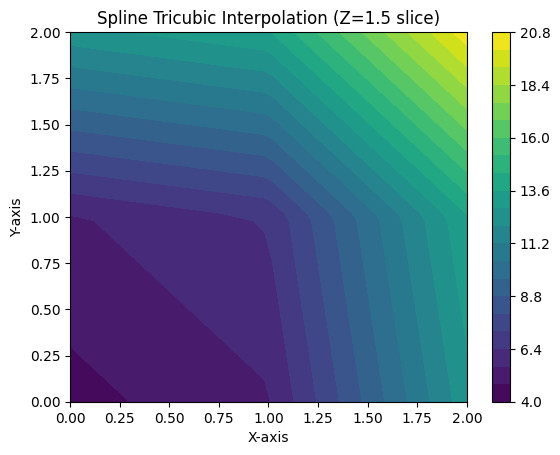

In [43]:
###Spline Tricubic Interpolation (3 Axes)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Known data points for a 3D grid (x, y, z axes)
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
z = np.array([0, 1, 2])
values = np.array([[[0, 1, 8], [1, 2, 9], [8, 9, 16]],
                   [[1, 2, 9], [2, 3, 10], [9, 10, 17]],
                   [[8, 9, 16], [9, 10, 17], [16, 17, 24]]])

# Spline tricubic interpolation using RegularGridInterpolator
spline_tricubic = RegularGridInterpolator((x, y, z), values, method='linear')

# Interpolation for unknown point
unknown_point = [1.5, 1.5, 1.5]
interpolated_value = spline_tricubic(unknown_point).item()  # Convert result to scalar using .item()

# Display the interpolated value
print(f"Interpolated value at point {unknown_point}: {interpolated_value:.2f}")

# Visualization: Slicing through Z=1.5 to get a 2D projection
x_new = np.linspace(0, 2, 50)
y_new = np.linspace(0, 2, 50)
x_grid, y_grid = np.meshgrid(x_new, y_new)
z_slice = 1.5
values_interpolated = spline_tricubic((x_grid.ravel(), y_grid.ravel(), np.full_like(x_grid.ravel(), z_slice))).reshape(50, 50)

# Plot the 2D projection for Z=1.5
plt.contourf(x_grid, y_grid, values_interpolated, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Spline Tricubic Interpolation (Z=1.5 slice)')
plt.show()



Interpolated value at point [1.5, 1.5, 1.5]: 13.50


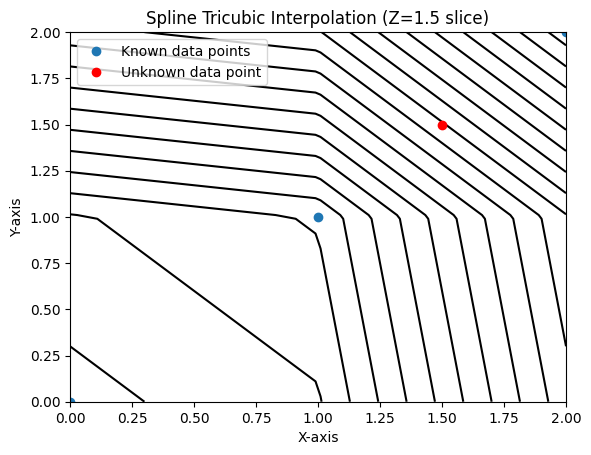

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Known data points for a 3D grid (x, y, z axes)
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
z = np.array([0, 1, 2])
values = np.array([[[0, 1, 8], [1, 2, 9], [8, 9, 16]],
                   [[1, 2, 9], [2, 3, 10], [9, 10, 17]],
                   [[8, 9, 16], [9, 10, 17], [16, 17, 24]]])

# Spline tricubic interpolation using RegularGridInterpolator
spline_tricubic = RegularGridInterpolator((x, y, z), values, method='linear')

# Interpolation for unknown point
unknown_point = [1.5, 1.5, 1.5]
interpolated_value = spline_tricubic(unknown_point).item()  # Convert result to scalar using .item()

# Display the interpolated value
print(f"Interpolated value at point {unknown_point}: {interpolated_value:.2f}")

# Visualization: Slicing through Z=1.5 to get a 2D projection
x_new = np.linspace(0, 2, 100)
y_new = np.linspace(0, 2, 100)
x_grid, y_grid = np.meshgrid(x_new, y_new)
z_slice = 1.5
values_interpolated = spline_tricubic((x_grid.ravel(), y_grid.ravel(), np.full_like(x_grid.ravel(), z_slice))).reshape(100, 100)

# Plot the simplified interpolation result with lines instead of a color map
plt.plot(x, y, 'o', label='Known data points')  # Known data points
plt.contour(x_grid, y_grid, values_interpolated, levels=20, colors='black')  # Contour lines
plt.plot([unknown_point[0]], [unknown_point[1]], 'ro', label='Unknown data point')  # Unknown point

# Labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Spline Tricubic Interpolation (Z=1.5 slice)')

# Legend and show
plt.legend()
plt.show()
